In [185]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
trial_df = pd.merge(mouse_drug, clinical_trial,on="Mouse ID")


# Display the data table for preview
trial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [186]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
trial_average = pd.DataFrame(trial_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean())
# Convert to DataFrame
trial_average.head()
# Preview DataFrame


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [187]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
trial_sem = pd.DataFrame(trial_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem())
# Convert to DataFrame
trial_average.head()
# Convert to DataFrame

# Preview DataFrame



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [188]:
# Minor Data Munging to Re-Format the Data Frames
trial_pivot = trial_average.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_pivot = trial_sem.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
trial_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


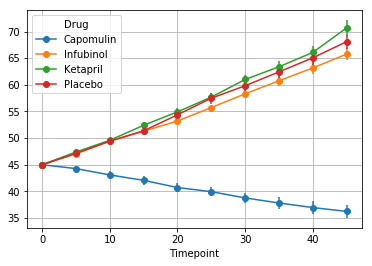

In [189]:
# Generate the Plot (with Error Bars)
average_df = trial_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
error_df = sem_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
trial_plot = average_df.plot(kind="line",yerr=error_df,marker='o',grid=True)
# Save the Figure
plt.savefig("./Images/1.png")


In [190]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [191]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_average = pd.DataFrame(trial_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean())
# Convert to DataFrame
meta_average.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [192]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

meta_sem = pd.DataFrame(trial_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem())
meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [193]:
# Minor Data Munging to Re-Format the Data Frames

meta_avg_pivot = meta_average.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_sem_pivot = meta_sem.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_avg_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


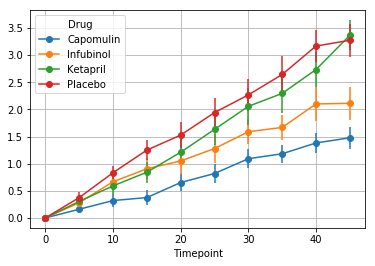

In [194]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure

average_df = meta_avg_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
error_df = meta_sem_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
trial_plot = average_df.plot(kind="line",yerr=error_df,marker='o',grid=True)
# Save the Figure
plt.savefig("./Images/2.png")



## Survival Rates

In [195]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

mouse_df = trial_df.groupby(["Drug","Timepoint"])
mouse_df = mouse_df["Mouse ID"].count()
mouse_df = pd.DataFrame(mouse_df)
mouse_df = mouse_df.rename(columns={"Mouse ID":"Mouse Count"})
mouse_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [196]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

mouse_pivot = mouse_df.pivot_table(index='Timepoint', columns='Drug', values='Mouse Count')
mouse_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [197]:
mouse_pivot = mouse_pivot.apply(lambda x: x/x.max())
mouse_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.000000,1.00
5,1.00,0.84,1.00,0.92,0.92,0.96,0.961538,1.00,0.961538,0.96
10,1.00,0.80,0.84,0.88,0.84,0.96,0.884615,0.96,0.884615,0.88
15,0.96,0.76,0.84,0.76,0.84,0.80,0.653846,0.96,0.884615,0.84
20,0.92,0.72,0.80,0.76,0.80,0.76,0.653846,0.92,0.807692,0.68
25,0.88,0.72,0.72,0.76,0.72,0.68,0.538462,0.92,0.730769,0.64
30,0.88,0.64,0.68,0.72,0.60,0.60,0.500000,0.92,0.692308,0.60
35,0.88,0.56,0.48,0.68,0.60,0.56,0.384615,0.84,0.615385,0.56
40,0.84,0.56,0.40,0.60,0.60,0.48,0.346154,0.80,0.461538,0.56


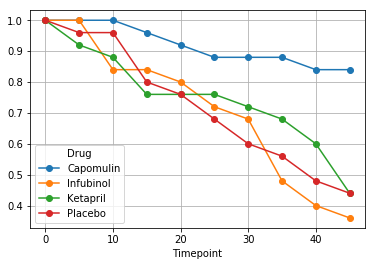

In [198]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure



average_df = mouse_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
error_df = mouse_pivot[["Capomulin","Infubinol","Ketapril","Placebo"]]
trial_plot = average_df.plot(kind="line",marker='o',grid=True)
plt.savefig("./Images/3.png")

## Summary Bar Graph

In [199]:
# Calculate the percent changes for each drug

# Display the data to confirm

perc = trial_average['Tumor Volume (mm3)'].pct_change(periods=9)
perc = pd.DataFrame(perc)
perc = perc.reset_index()
perc = perc.loc[perc["Timepoint"]==45]
perc.drop("Timepoint",axis=1)
perc = perc.reset_index()
perc.drop(["index","Timepoint"],axis=1)

,Drug,Tumor Volume (mm3)
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Ketapril,0.570288
4,Naftisol,0.539233
5,Placebo,0.512980
6,Propriva,0.472412
7,Ramicane,-0.223209
8,Stelasyn,0.520851
9,Zoniferol,0.465798


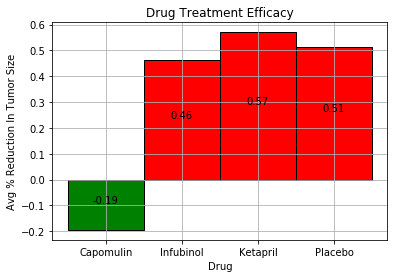

In [200]:
# Store all Relevant Percent Changes into a Tuple
fig, ax = plt.subplots()

perc_tuple = (-.1947,.4612,.5703,.5130)
x_axis = ("Capomulin","Infubinol","Ketapril","Placebo")

# Splice the data between passing and failing drugs

fig = plt.bar(x_axis, perc_tuple, color=["g","r","r","r"], align="center",width=1,edgecolor="black")
plt.grid()

# Orient widths. Add labels, tick marks, etc. 

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height/2,
                "{:.2f}".format(height),
                ha='center', va='bottom')
        
autolabel(fig)


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure

plt.title("Drug Treatment Efficacy")
plt.xlabel("Drug")
plt.ylabel("Avg % Reduction In Tumor Size")




# Show the Figure
plt.savefig("./Images/4.png")



Conclusion:
1) Capomulin is an effective drug for reducing tumor size
2) Capomulin resulted in the lowest mortality rate over the course of the trial
3) Infunibol resulted in a higher mortality rate than even the placebo and was not successful.